# Regresion logistica

In [2]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt

## Ejemplos de regresión logistica

In [3]:
# Definimos la función que define el comportamiento

def series(x0,r,iter=2):
    x = np.zeros(iter)
    x[0] = x0
    for i in range(iter-1):
        x[i+1] = r * x[i] * (1 - x[i])

    return x

In [4]:
# Definimos los parametros de la simulación

x0 = 0.5
r = 3.9
iter = 1000

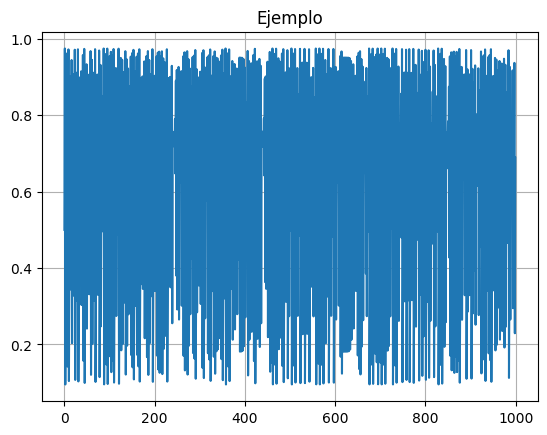

In [5]:
# Hacemos una prueba

x = series(x0,r,iter)
plt.plot(range(iter),x)
plt.title('Ejemplo')
plt.grid()
plt.show()

# Bifurcación de la regresión logistica

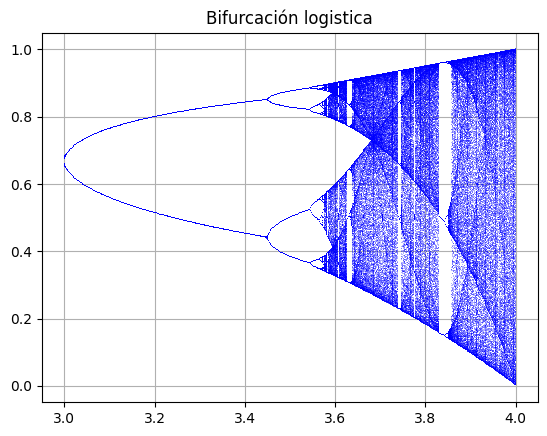

In [6]:
# Calcularemos resultados para diferentes valores de r

r = np.linspace(3,5,1000)
iter = 1000
last= 800
x = 1e-3 * np.ones(iter)

for i in range(iter):
    x = r * x * (1 - x)
    if i >= (iter - last):
        plt.plot(r,x,',b',alpha=0.3)

plt.title("Bifurcación logistica")
plt.grid()
plt.show()

## ¿Que sucede si probamos con otra función similar?

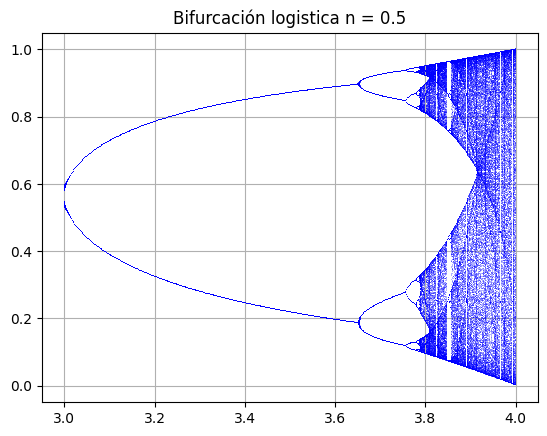

In [7]:
# Calcularemos resultados para diferentes valores de r

r = np.linspace(3,5,1000)
iter = 1000
last= 800
n = 0.5
x = 1e-3 * np.ones(iter)

for i in range(iter):
    x = r * np.power(x,n) * (1 - np.power(x,n))
    if i >= (iter - last):
        plt.plot(r,x,',b',alpha=0.3)

plt.title("Bifurcación logistica n = "+str(n))
plt.grid()
plt.show()

## Control del caos

In [8]:
# Seleccionaremos un valor objetivo
target = 0.35

In [9]:
# Crearemos las condiciones iniciales de la simulación
x0 = 0.3
r0 = 3.9
iter = 1500

In [10]:
# Definimos el algoritmo más simple para el control de caos
# Un caso proporcional
delta = 0.05
k = 0.01

def control(x,target,delta,r,k):
    if abs(target - x) >= delta:
        r = r + k * (target - x)
    return r


In [11]:
# Realizamos la simulación

x = np.zeros(iter)
r = np.zeros(iter)
x[0] = x0
r[0] = r0

for i in range(iter-1):
    x[i+1] = series(x[i],r[i])[-1]   # Ultimo valor
    r[i+1] = control(x[i],target,delta,r[i],k)

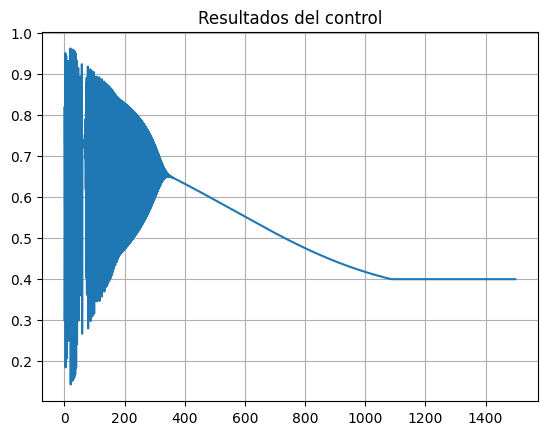

In [12]:
# Graficamos los resultados
plt.plot(range(iter),x)
plt.title("Resultados del control")
plt.grid()
plt.show()

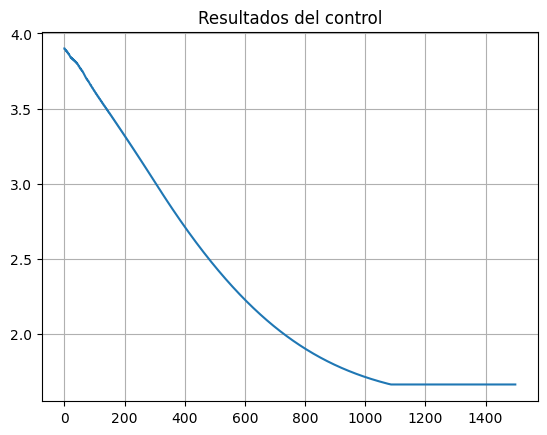

In [13]:
# Graficamos los resultados
plt.plot(range(iter),r)
plt.title("Resultados del control")
plt.grid()
plt.show()

In [14]:
# Vemos el valor final
x[-1]

0.39964052744149187

Podemos ver que el valor converge pero con cierto offset sobre el valor.